# Data Manipulation

## Assignment: Fandango Movie Ratings

### Name:  Richard Lee

## Data

Our data set comes from the data journalism site, [FiveThirtyEight](https://fivethirtyeight.com/), and was used for a 2015 article titled '[Be Suspicious Of Online Movie Ratings, Especially Fandango’s](https://fivethirtyeight.com/features/fandango-movies-ratings/)'.  The first step of this project is to read this article as it sets up the rest of this assignment and so that you will understand the data.

## Assignment

In this assignment, we will use Pandas to explore the data set from the article and to practice some basics including merging files.  Our data will be slightly different than the article as it appears they were working with a larger set of data.

In [1]:
import pandas as pd
import numpy as np

# set display columns - Do not change or CodeGrade may not function correctly
pd.set_option('display.max_columns', None)

**Exercise:** Import the data from the four csv files: `fandango.csv`, `imdb.csv`, `metacritic.csv`, and `rt.csv`as four separate DataFrames.  Take time to review the data in the four DataFrames.

In [2]:
fandango_df = pd.read_csv('fandango.csv')
imdb = pd.read_csv('imdb.csv')
metacritic = pd.read_csv('metacritic.csv')
rt = pd.read_csv('rt.csv')
imdb

,film,imdb,imdb_norm,imdb_norm_round,imdb_user_vote_count
0,Fantastic Four (2015),4.0,2.00,2.0,39838
1,Fifty Shades of Grey (2015),4.2,2.10,2.0,179506
2,Paul Blart: Mall Cop 2 (2015),4.3,2.15,2.0,15004
3,The Gallows (2015),4.4,2.20,2.0,5511
4,The Boy Next Door (2015),4.6,2.30,2.5,19658
...,...,...,...,...,...
141,Song of the Sea (2014),8.2,4.10,4.0,14067
142,Mad Max: Fury Road (2015),8.3,4.15,4.0,292023
143,Straight Outta Compton (2015),8.4,4.20,4.0,15982
144,The Salt of the Earth (2015),8.4,4.20,4.0,6605


As you can see, this data contains the review scores for four review sites: Fandango, IMDB, Metacritic, and Rotten Tomatoes.  These sites use different methodologies in terms of ratings, and Rotten Tomatoes and Metacritic have separate critic scores and user scores.

According to the 538 article, the columns with 'norm' in the column name are scores that have been normalized to the five-star rating scale that Fandango uses and the columns with 'norm_round' in the column name are those columns rounded to the nearest half-star.

**Exercise:** Merge the four files together into one DataFrame called `fandango`.

In [3]:

fandango = pd.concat([fandango_df.set_index('film'), imdb.set_index('film'), metacritic.set_index('film'), rt.set_index('film')], axis=1).reset_index()
fandango


,film,fandango_stars,fandango_rating_value,fandango_votes,fandango_difference,imdb,imdb_norm,imdb_norm_round,imdb_user_vote_count,metacritic,metacritic_user,metacritic_norm,metacritic_user_norm,metacritic_norm_round,metacritic_user_norm_round,metacritic_user_vote_count,rt,rt_user,rt_norm,rt_user_norm,rt_norm_round,rt_user_norm_round
0,Fantastic Four (2015),3.0,2.7,6288,0.3,4.0,2.00,2.0,39838,27,2.5,1.35,1.25,1.5,1.5,421,9,20,0.45,1.00,0.5,1.0
1,Unfriended (2015),3.0,2.7,2507,0.3,5.9,2.95,3.0,22348,59,5.8,2.95,2.90,3.0,3.0,130,60,39,3.00,1.95,3.0,2.0
2,Poltergeist (2015),3.0,2.8,2704,0.2,5.0,2.50,2.5,21372,47,3.7,2.35,1.85,2.5,2.0,142,31,24,1.55,1.20,1.5,1.0
3,Blackhat (2015),3.0,2.8,1430,0.2,5.4,2.70,2.5,27328,51,5.4,2.55,2.70,2.5,2.5,80,34,25,1.70,1.25,1.5,1.5
4,The Gallows (2015),3.0,2.9,1896,0.1,4.4,2.20,2.0,5511,30,7.0,1.50,3.50,1.5,3.5,80,16,27,0.80,1.35,1.0,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,"McFarland, USA (2015)",5.0,4.6,3364,0.4,7.5,3.75,4.0,13769,60,7.2,3.00,3.60,3.0,3.5,59,79,89,3.95,4.45,4.0,4.5
142,Selma (2014),5.0,4.6,7025,0.4,7.5,3.75,4.0,45344,89,7.1,4.45,3.55,4.5,3.5,316,99,86,4.95,4.30,5.0,4.5
143,American Sniper (2015),5.0,4.8,34085,0.2,7.4,3.70,3.5,251856,72,6.6,3.60,3.30,3.5,3.5,850,72,85,3.60,4.25,3.5,4.5
144,Furious 7 (2015),5.0,4.8,33538,0.2,7.4,3.70,3.5,207211,67,6.8,3.35,3.40,3.5,3.5,764,81,84,4.05,4.20,4.0,4.0


**Exercise:** Put the columns for `fandango` in the following order if they are not so already:
- film
- fandango_stars
- fandango_rating_value
- fandango_votes
- fandango_difference
- imdb
- imdb_norm
- imdb_norm_round
- imdb_user_vote_count
- metacritic
- metacritic_user
- metacritic_norm
- metacritic_user_norm
- metacritic_norm_round
- metacritic_user_norm_round
- metacritic_user_vote_count
- rt
- rt_user
- rt_norm
- rt_user_norm
- rt_norm_round
- rt_user_norm_round

In [4]:
fandango.columns

Index(['film', 'fandango_stars', 'fandango_rating_value', 'fandango_votes',
       'fandango_difference', 'imdb', 'imdb_norm', 'imdb_norm_round',
       'imdb_user_vote_count', 'metacritic', 'metacritic_user',
       'metacritic_norm', 'metacritic_user_norm', 'metacritic_norm_round',
       'metacritic_user_norm_round', 'metacritic_user_vote_count', 'rt',
       'rt_user', 'rt_norm', 'rt_user_norm', 'rt_norm_round',
       'rt_user_norm_round'],
      dtype='object')

**Exercise:** Sort the `fandango` DataFrame in alphabetical order by the `film` column.

In [5]:
fandango  = fandango.sort_values('film', ascending=True)
fandango

,film,fandango_stars,fandango_rating_value,fandango_votes,fandango_difference,imdb,imdb_norm,imdb_norm_round,imdb_user_vote_count,metacritic,metacritic_user,metacritic_norm,metacritic_user_norm,metacritic_norm_round,metacritic_user_norm_round,metacritic_user_vote_count,rt,rt_user,rt_norm,rt_user_norm,rt_norm_round,rt_user_norm_round
35,'71 (2015),3.5,3.5,192,0.0,7.2,3.60,3.5,24116,83,7.5,4.15,3.75,4.0,4.0,60,97,82,4.85,4.10,5.0,4.0
45,5 Flights Up (2015),4.0,3.6,79,0.4,6.1,3.05,3.0,2174,55,6.8,2.75,3.40,3.0,3.5,6,52,47,2.60,2.35,2.5,2.5
70,A Little Chaos (2015),4.0,3.9,83,0.1,6.4,3.20,3.0,4778,51,7.0,2.55,3.50,2.5,3.5,7,40,47,2.00,2.35,2.0,2.5
30,A Most Violent Year (2014),3.5,3.4,675,0.1,7.1,3.55,3.5,32166,79,7.0,3.95,3.50,4.0,3.5,133,90,69,4.50,3.45,4.5,3.5
49,About Elly (2015),4.0,3.6,43,0.4,8.2,4.10,4.0,20659,87,9.6,4.35,4.80,4.5,5.0,23,97,86,4.85,4.30,5.0,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,What We Do in the Shadows (2015),4.5,4.3,259,0.2,7.6,3.80,4.0,39561,75,8.3,3.75,4.15,4.0,4.0,69,96,86,4.80,4.30,5.0,4.5
98,When Marnie Was There (2015),4.5,4.1,46,0.4,7.8,3.90,4.0,4160,71,6.4,3.55,3.20,3.5,3.0,29,89,89,4.45,4.45,4.5,4.5
8,While We're Young (2015),3.0,2.9,449,0.1,6.4,3.20,3.0,17647,76,6.7,3.80,3.35,4.0,3.5,65,83,52,4.15,2.60,4.0,2.5
95,Wild Tales (2014),4.5,4.1,235,0.4,8.2,4.10,4.0,50285,77,8.8,3.85,4.40,4.0,4.5,107,96,92,4.80,4.60,5.0,4.5


**Exercise:** Reset the index of the `fandango` DataFrame.  The `drop` parameter should be set to `True`.

In [6]:
fandango.reset_index(drop=True, inplace=True)


**Q1:** The article begins by talking about the movie: `Fantastic Four (2015)`. Select only this row for this film from the `fandango` DataFrame.  Save it as `Q1`.

In [7]:
Q1 = fandango.loc[fandango['film'] == 'Fantastic Four (2015)']

Q1

,film,fandango_stars,fandango_rating_value,fandango_votes,fandango_difference,imdb,imdb_norm,imdb_norm_round,imdb_user_vote_count,metacritic,metacritic_user,metacritic_norm,metacritic_user_norm,metacritic_norm_round,metacritic_user_norm_round,metacritic_user_vote_count,rt,rt_user,rt_norm,rt_user_norm,rt_norm_round,rt_user_norm_round
29,Fantastic Four (2015),3.0,2.7,6288,0.3,4.0,2.0,2.0,39838,27,2.5,1.35,1.25,1.5,1.5,421,9,20,0.45,1.0,0.5,1.0


As you can see, the `Fandango_Stars` rating is `3.0` while if we look at the other ratings from the other review sites (looking at the columns with `norm` in the column name) you will notice the review scores being much lower.

**Q2:** Select the `fandango_stars` column as a Series and save it as `Q2A`.  What is the minimum score in the Series `Q2A`?  Save this minimum value as `Q2B`.

In [8]:
Q2A = fandango['fandango_stars']
Q2A

0      3.5
1      4.0
2      4.0
3      3.5
4      4.0
      ... 
141    4.5
142    4.5
143    3.0
144    4.5
145    4.5
Name: fandango_stars, Length: 146, dtype: float64

In [9]:
Q2B = Q2A.min()
Q2B

3.0

If you were to check the minimum and maximum ranges for the other review sites, you should notice that the range of scores for the Fandango star ratings is much more narrow, and the other sites also have a much wider range of values.

Run the cell below to view boxplots of the various site's star ratings.  Notice the smaller range and higher minimum for the Fandango star ratings.

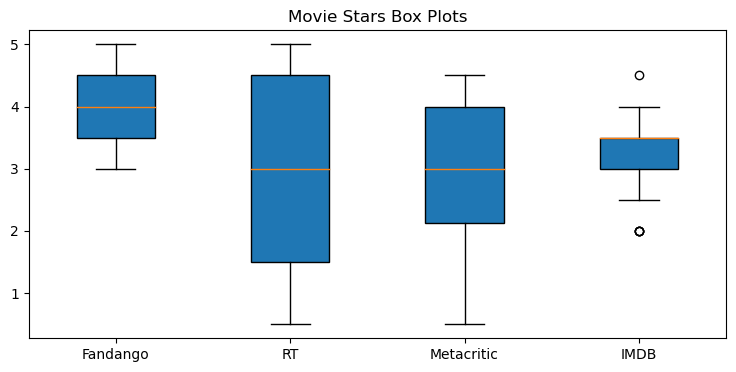

In [10]:
import matplotlib.pyplot as plt

data = fandango[['fandango_stars','rt_norm_round','metacritic_norm_round','imdb_norm_round']]
labels = ['Fandango', 'RT', 'Metacritic','IMDB']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))

# rectangular box plot
bplot1 = ax.boxplot(data,
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks

ax.set_title('Movie Stars Box Plots')

plt.show()

**Q3:** In the article, the author "normalized" the data by turning the sites with 0-100 ranges to 0-5 ranges.  
- Create a Series called `Q3` that takes the values in the `rt` column and normalizes them to 0-5 ranges.  In other words a score of:
  - 100 would equal 5
  - 75 would equal 3.75
  - 50 would equal 2.5
  - 25 would equal 1.25
  - etc
- You should be able to calculate this with one line of code. 
- Round your `Q3` to 2 decimal places to prevent any decimal point precision problems depending on how you code the solution

In [11]:
Q3 = ((fandango['rt'] / 100) * 5).round(2)
Q3

0      4.85
1      2.60
2      2.00
3      4.50
4      4.85
       ... 
141    4.80
142    4.45
143    4.15
144    4.80
145    2.60
Name: rt, Length: 146, dtype: float64

**Code Check:**  To double check your calculation, your Series should match exactly the `rt_norm` column. (uncomment and run the code below)

In [12]:
# uncomment below code to double check your answer
(fandango['rt_norm'] != Q3).sum()

0

**Q4:** The article mentions the movie `Avengers: Age of Ultron (2015)`.  Select this film in the `fandango` data and save this as `Q4`.

In [13]:
Q4 = fandango.loc[fandango['film'] == 'Avengers: Age of Ultron (2015)']
Q4

,film,fandango_stars,fandango_rating_value,fandango_votes,fandango_difference,imdb,imdb_norm,imdb_norm_round,imdb_user_vote_count,metacritic,metacritic_user,metacritic_norm,metacritic_user_norm,metacritic_norm_round,metacritic_user_norm_round,metacritic_user_vote_count,rt,rt_user,rt_norm,rt_user_norm,rt_norm_round,rt_user_norm_round
11,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,7.8,3.9,4.0,271107,66,7.1,3.3,3.55,3.5,3.5,1330,74,86,3.7,4.3,3.5,4.5


**Q5:** Select only the `film`, `fandango_stars`, and `fandango_rating_value` columns from `Q4` and save it as `Q5`.

In [14]:
Q5 = Q4[['film', 'fandango_stars', 'fandango_rating_value']]
Q5

,film,fandango_stars,fandango_rating_value
11,Avengers: Age of Ultron (2015),5.0,4.5


As was mentioned in the article, you can see that this movie gained an entire half star between the actual rating score and the stars score.

The next four questions are just some basic practice with filtering data.

**Q6:** Select all movies with an `imdb` score of 8 or higher.  Save this DataFrame as `Q6`.

In [15]:
Q6 = fandango.loc[fandango['imdb'] >= 8]
Q6

,film,fandango_stars,fandango_rating_value,fandango_votes,fandango_difference,imdb,imdb_norm,imdb_norm_round,imdb_user_vote_count,metacritic,metacritic_user,metacritic_norm,metacritic_user_norm,metacritic_norm_round,metacritic_user_norm_round,metacritic_user_vote_count,rt,rt_user,rt_norm,rt_user_norm,rt_norm_round,rt_user_norm_round
4,About Elly (2015),4.0,3.6,43,0.4,8.2,4.10,4.0,20659,87,9.6,4.35,4.80,4.5,5.0,23,97,86,4.85,4.30,5.0,4.5
8,Amy (2015),4.5,4.4,729,0.1,8.0,4.00,4.0,5630,85,8.8,4.25,4.40,4.5,4.5,60,97,91,4.85,4.55,5.0,4.5
43,Inside Out (2015),4.5,4.5,15749,0.0,8.6,4.30,4.5,96252,94,8.9,4.70,4.45,4.5,4.5,807,98,90,4.90,4.50,5.0,4.5
55,Mad Max: Fury Road (2015),4.5,4.3,10509,0.2,8.3,4.15,4.0,292023,89,8.7,4.45,4.35,4.5,4.5,2375,97,88,4.85,4.40,5.0,4.5
61,Me and Earl and The Dying Girl (2015),4.5,4.3,624,0.2,8.2,4.10,4.0,5269,74,8.4,3.70,4.20,3.5,4.0,41,81,89,4.05,4.45,4.0,4.5
89,Song of the Sea (2014),4.5,4.3,66,0.2,8.2,4.10,4.0,14067,86,8.2,4.30,4.10,4.5,4.0,62,99,92,4.95,4.60,5.0,4.5
94,Straight Outta Compton (2015),5.0,4.8,8096,0.2,8.4,4.20,4.0,15982,72,7.3,3.60,3.65,3.5,3.5,90,90,94,4.50,4.70,4.5,4.5
113,The Imitation Game (2014),5.0,4.6,8055,0.4,8.1,4.05,4.0,334164,73,8.2,3.65,4.10,3.5,4.0,566,90,92,4.50,4.60,4.5,4.5
120,The Salt of the Earth (2015),4.5,4.3,83,0.2,8.4,4.20,4.0,6605,83,7.8,4.15,3.90,4.0,4.0,13,96,90,4.80,4.50,5.0,4.5
144,Wild Tales (2014),4.5,4.1,235,0.4,8.2,4.10,4.0,50285,77,8.8,3.85,4.40,4.0,4.5,107,96,92,4.80,4.60,5.0,4.5


**Q7:** Select all movies with a `rt` score of 100.  Save this DataFrame as `Q7`.

In [16]:
Q7 = fandango.loc[fandango['rt'] == 100]
Q7

,film,fandango_stars,fandango_rating_value,fandango_votes,fandango_difference,imdb,imdb_norm,imdb_norm_round,imdb_user_vote_count,metacritic,metacritic_user,metacritic_norm,metacritic_user_norm,metacritic_norm_round,metacritic_user_norm_round,metacritic_user_vote_count,rt,rt_user,rt_norm,rt_user_norm,rt_norm_round,rt_user_norm_round
35,Gett: The Trial of Viviane Amsalem (2015),3.5,3.5,59,0.0,7.8,3.90,4.0,1955,90,7.3,4.50,3.65,4.5,3.5,19,100,81,5.0,4.05,5.0,4.0
86,Seymour: An Introduction (2015),4.5,4.2,41,0.3,7.7,3.85,4.0,243,83,6.0,4.15,3.00,4.0,3.0,4,100,87,5.0,4.35,5.0,4.5


**Q8:** Select all movies with a `metacritic` score less than 20. Save this DataFrame as `Q8`.

In [17]:
Q8 = fandango.loc[fandango['metacritic'] < 20]
Q8

,film,fandango_stars,fandango_rating_value,fandango_votes,fandango_difference,imdb,imdb_norm,imdb_norm_round,imdb_user_vote_count,metacritic,metacritic_user,metacritic_norm,metacritic_user_norm,metacritic_norm_round,metacritic_user_norm_round,metacritic_user_vote_count,rt,rt_user,rt_norm,rt_user_norm,rt_norm_round,rt_user_norm_round
71,Paul Blart: Mall Cop 2 (2015),3.5,3.5,3054,0.0,4.3,2.15,2.0,15004,13,2.4,0.65,1.2,0.5,1.0,211,5,36,0.25,1.8,0.5,2.0


**Q9:** Select all movies with a `rt_user` greater than 85, `metacritic_user` score greater than 8.5, and an `imdb` score greater than 8.5.  In other words, select the movies that meet all three of these criteria.  Save this DataFrame as `Q9`.  

In [18]:
Q9 = fandango.loc[(fandango['rt_user'] > 85) & (fandango['metacritic_user'] > 8.5) & (fandango['imdb'] > 8.5)]
Q9

,film,fandango_stars,fandango_rating_value,fandango_votes,fandango_difference,imdb,imdb_norm,imdb_norm_round,imdb_user_vote_count,metacritic,metacritic_user,metacritic_norm,metacritic_user_norm,metacritic_norm_round,metacritic_user_norm_round,metacritic_user_vote_count,rt,rt_user,rt_norm,rt_user_norm,rt_norm_round,rt_user_norm_round
43,Inside Out (2015),4.5,4.5,15749,0.0,8.6,4.3,4.5,96252,94,8.9,4.7,4.45,4.5,4.5,807,98,90,4.9,4.5,5.0,4.5


**Q10:** The article from 538 goes into detail about the rounding problem with the Fandango star scores.  Let's see if we can do better.  
- First create a copy of the `fandango` DataFrame and call it `Q10A`.  
- Create a new column in the `Q10A` DataFrame called `fandango_stars_revised` that rounds the `fandango_rating_value` column to the nearest half a star.  For example, 3.2 would round to 3.0, 3.3 would round to 3.5, 3.7 would round to 3.5, 3.8 would round to 4.0, etc.  
- Select only the `film`, `fandango_rating_value`, and `fandango_stars_revised` columns and save this DataFrame as `Q10B`.
- Code Check:  Select all movies with a `Fandango_Ratingvalue` of 3.7 and make sure that you rounded this to 3.5.  Select all movies with a `Fandango_Ratingvalue` of 3.8 and make sure that you rounded this to 4.0. 

In [19]:
Q10A = fandango.copy()
Q10A

,film,fandango_stars,fandango_rating_value,fandango_votes,fandango_difference,imdb,imdb_norm,imdb_norm_round,imdb_user_vote_count,metacritic,metacritic_user,metacritic_norm,metacritic_user_norm,metacritic_norm_round,metacritic_user_norm_round,metacritic_user_vote_count,rt,rt_user,rt_norm,rt_user_norm,rt_norm_round,rt_user_norm_round
0,'71 (2015),3.5,3.5,192,0.0,7.2,3.60,3.5,24116,83,7.5,4.15,3.75,4.0,4.0,60,97,82,4.85,4.10,5.0,4.0
1,5 Flights Up (2015),4.0,3.6,79,0.4,6.1,3.05,3.0,2174,55,6.8,2.75,3.40,3.0,3.5,6,52,47,2.60,2.35,2.5,2.5
2,A Little Chaos (2015),4.0,3.9,83,0.1,6.4,3.20,3.0,4778,51,7.0,2.55,3.50,2.5,3.5,7,40,47,2.00,2.35,2.0,2.5
3,A Most Violent Year (2014),3.5,3.4,675,0.1,7.1,3.55,3.5,32166,79,7.0,3.95,3.50,4.0,3.5,133,90,69,4.50,3.45,4.5,3.5
4,About Elly (2015),4.0,3.6,43,0.4,8.2,4.10,4.0,20659,87,9.6,4.35,4.80,4.5,5.0,23,97,86,4.85,4.30,5.0,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,What We Do in the Shadows (2015),4.5,4.3,259,0.2,7.6,3.80,4.0,39561,75,8.3,3.75,4.15,4.0,4.0,69,96,86,4.80,4.30,5.0,4.5
142,When Marnie Was There (2015),4.5,4.1,46,0.4,7.8,3.90,4.0,4160,71,6.4,3.55,3.20,3.5,3.0,29,89,89,4.45,4.45,4.5,4.5
143,While We're Young (2015),3.0,2.9,449,0.1,6.4,3.20,3.0,17647,76,6.7,3.80,3.35,4.0,3.5,65,83,52,4.15,2.60,4.0,2.5
144,Wild Tales (2014),4.5,4.1,235,0.4,8.2,4.10,4.0,50285,77,8.8,3.85,4.40,4.0,4.5,107,96,92,4.80,4.60,5.0,4.5


In [20]:
Q10A['fandango_stars_revised'] = Q10A['fandango_rating_value'].mul(2).round().div(2)

In [21]:
Q10B = Q10A[['film', 'fandango_rating_value', 'fandango_stars_revised']]
Q10B

,film,fandango_rating_value,fandango_stars_revised
0,'71 (2015),3.5,3.5
1,5 Flights Up (2015),3.6,3.5
2,A Little Chaos (2015),3.9,4.0
3,A Most Violent Year (2014),3.4,3.5
4,About Elly (2015),3.6,3.5
...,...,...,...
141,What We Do in the Shadows (2015),4.3,4.5
142,When Marnie Was There (2015),4.1,4.0
143,While We're Young (2015),2.9,3.0
144,Wild Tales (2014),4.1,4.0


In [22]:
Q10B_check = Q10B.loc[Q10B['fandango_rating_value'] == 3.7]
Q10B_check

,film,fandango_rating_value,fandango_stars_revised
7,American Ultra (2015),3.7,3.5
13,Birdman (2014),3.7,3.5
19,Child 44 (2015),3.7,3.5
23,Dark Places (2015),3.7,3.5
38,Hot Pursuit (2015),3.7,3.5
76,Project Almanac (2015),3.7,3.5
78,Ricki and the Flash (2015),3.7,3.5
109,The Gift (2015),3.7,3.5
131,Tomorrowland (2015),3.7,3.5


In [23]:
Q10B_check2 = Q10B.loc[Q10B['fandango_rating_value'] == 3.8]
Q10B_check2

,film,fandango_rating_value,fandango_stars_revised
12,Big Eyes (2014),3.8,4.0
18,Chappie (2015),3.8,4.0
70,Paper Towns (2015),3.8,4.0
82,Self/less (2015),3.8,4.0
139,Vacation (2015),3.8,4.0
